# Drillhole EDA

10% of the entire data due to large volume of entire data (8 GB)

From Trevor: Sample data points for any particular drill hole will be co-located on a map. An assumption of sample co-location for each drill hole is adequate for our purpose although in reality some will have been drilled inclined rather than straight vertically. 

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopy.distance
from tqdm import tqdm

## Dataframe info

In [86]:
df = pd.read_csv('dd_20210723_sample_10pct.csv')
df.head()

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
0,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.60,79089,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,8.0,-9999.0
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [88]:
df.shape

(856405, 172)

There are 856,405 rows and 172 columns. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856405 entries, 0 to 856404
Columns: 172 entries, Unnamed: 0 to ZrO2_PPM
dtypes: float64(140), int64(29), object(3)
memory usage: 1.1+ GB


In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Unnamed: 0', 'CollarId', 'Azimuth', 'Dip', 'Anumber', 'SampleId', 'AlO_PPM', 'AsO_PPM', 'Bi2O3_PPM', 'BiO_PPM', 'CaCO3_PPM', 'CrO_PPM', 'CsO_PPM', 'HfO_PPM', 'HM_PPM', 'I_PPM', 'KO_PPM', 'LaO_PPM', 'MgCO3_PPM', 'MnO2_PPM', 'NaO_PPM', 'NbO_PPM', 'PO_PPM', 'RbO_PPM', 'SbO_PPM', 'SnO_PPM', 'TaO_PPM', 'ThO_PPM', 'WO_PPM'], float64: ['Longitude', 'Latitude', 'MaxDepth', 'FromDepth', 'ToDepth', 'Ag_PPM', 'Al_PPM', 'Al2O_PPM', 'Al2O3_PPM', 'As_PPM', 'As2O3_PPM', 'Au_PPM', 'B_PPM', 'Ba_PPM', 'BaO_PPM', 'Be_PPM', 'Bi_PPM', 'Br_PPM', 'C_PPM', 'Ca_PPM', 'CaO_PPM', 'Cd_PPM', 'Ce_PPM', 'CeO_PPM', 'CeO2_PPM', 'Cl_PPM', 'Co_PPM', 'CO2_PPM', 'Cr_PPM', 'Cr2O3_PPM', 'Cs_PPM', 'Cs2O_PPM', 'Cu_PPM', 'CuO_PPM', 'Dy_PPM', 'Dy2O3_PPM', 'Er_PPM', 'Er2O3_PPM', 'Eu_PPM', 'Eu2O3_PPM', 'F_PPM', 'Fe_PPM', 'Fe2O3_PPM', 'FeO_PPM', 'Ga_PPM', 'Ga2O3_PPM', 'Gd_PPM', 'Gd2O3_PPM', 'Ge_PPM', 'H2O_PPM', 'Hf_PPM', 'Hg_PPM', 'Ho_PPM', 'Ho2O3_PPM', 'In_PPM', 'Ir_PPM', 'K_PPM', 'K2O_PPM', 'La_PPM', 'La2O3_PPM', 'LE_P

140 columns are floats, 29 are ints and only 3 are objects (CompanyHoleId, Hole Type and CompanySampleID). 

### NAs

In [4]:
col_nas = df.isna().sum() 

In [5]:
col_nas[col_nas > 0] 

MaxDepth           50481
CompanySampleId    30232
dtype: int64

Only two columns have NAs, and they're not of interest to us for now. 

In [11]:
row_nas = df.isna().sum(axis=1)

In [18]:
row_nas[row_nas == 1].count()

67843

In [19]:
row_nas[row_nas == 2].count()

6435

In [20]:
row_nas[row_nas > 2].count()

0

No rows have more than 2 NAs

### Negative values

In [64]:
#number of rows where Zn is negative
df[df['Zn_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856399,438141,358919,YUG064,118.838935,-28.610698,DD,360,-90,128.60,74594,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [23]:
#number of rows where Cu is negative
df[df['Cu_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856399,438141,358919,YUG064,118.838935,-28.610698,DD,360,-90,128.60,74594,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [24]:
#number of rows where Ni is negative
df[df['Ni_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856402,791301,562730,CLD183,122.216975,-26.911738,DD,360,-90,407.90,74928,...,-9999,-9999.0,1.9,-9999.0,-9999.0,-9999.0,54.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [25]:
#number of rows where Co is negative
df[df['Co_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856399,438141,358919,YUG064,118.838935,-28.610698,DD,360,-90,128.60,74594,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [26]:
#number of rows where In is negative
df[df['In_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
0,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.60,79089,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,8.0,-9999.0
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856402,791301,562730,CLD183,122.216975,-26.911738,DD,360,-90,407.90,74928,...,-9999,-9999.0,1.9,-9999.0,-9999.0,-9999.0,54.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [27]:
#number of rows where In is negative
df[df['Ge_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
0,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.60,79089,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,8.0,-9999.0
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856402,791301,562730,CLD183,122.216975,-26.911738,DD,360,-90,407.90,74928,...,-9999,-9999.0,1.9,-9999.0,-9999.0,-9999.0,54.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


There are 674451 rows that have negative values for all the CMs of interest. We only keep positive values. 

In [31]:
df.loc[(df['Ge_PPM'] < 0) & (df['In_PPM'] < 0) & (df['Co_PPM'] < 0)]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856399,438141,358919,YUG064,118.838935,-28.610698,DD,360,-90,128.60,74594,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [89]:
df = df.loc[(df['Ge_PPM'] >= 0) | (df['In_PPM'] >= 0) | (df['Co_PPM'] >= 0)]
df.shape

(181954, 172)

Only 181954 have at least one of the minerals we want >= 0. 

### Number ranges

Some really high maximums there. But also most values are around 0. 

In [7]:
import seaborn as sns

In [37]:
df[df['Ge_PPM'] >=0]['Ge_PPM'].describe()

count    9553.000000
mean        0.759828
std         1.613325
min         0.000000
25%         0.160000
50%         0.300000
75%         1.000000
max        57.100000
Name: Ge_PPM, dtype: float64

<AxesSubplot:>

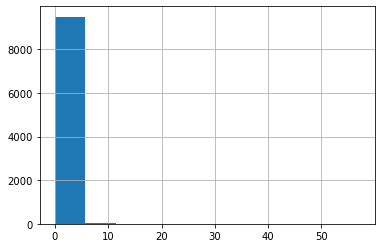

In [40]:
df[df['Ge_PPM'] >=0]['Ge_PPM'].hist()

<AxesSubplot:ylabel='Ge_PPM'>

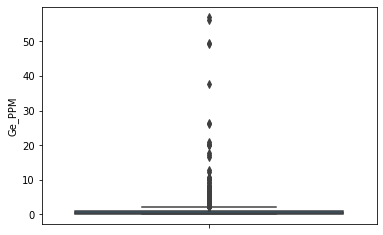

In [50]:
sns.boxplot(y = df[df['Ge_PPM'] >=0]['Ge_PPM'])

In [38]:
df[df['In_PPM'] >=0]['In_PPM'].describe()

count     13158.000000
mean         25.273872
std        1593.114359
min           0.000000
25%           0.029000
50%           0.050000
75%           0.080000
max      113000.000000
Name: In_PPM, dtype: float64

Range seems reasonable

<AxesSubplot:>

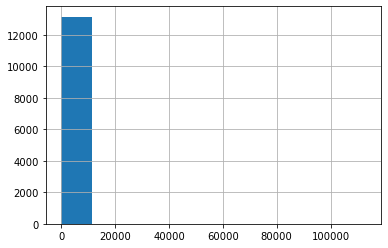

In [41]:
df[df['In_PPM'] >=0]['In_PPM'].hist()

<AxesSubplot:ylabel='In_PPM'>

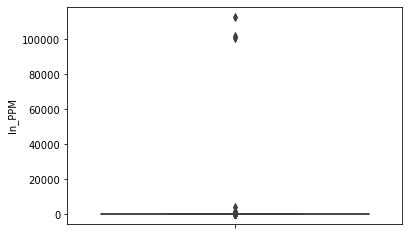

In [51]:
sns.boxplot(y = df[df['In_PPM'] >=0]['In_PPM'])

In [39]:
df[df['Co_PPM'] >=0]['Co_PPM'].describe()

count    1.809240e+05
mean     3.036314e+03
std      1.831804e+05
min      0.000000e+00
25%      1.300000e+01
50%      4.610000e+01
75%      1.000000e+02
max      3.340000e+07
Name: Co_PPM, dtype: float64

<AxesSubplot:>

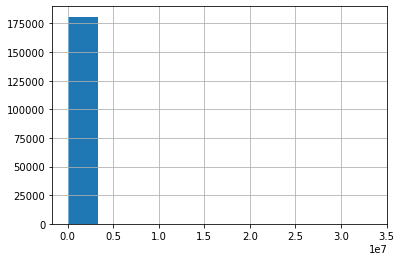

In [42]:
df[df['Co_PPM'] >=0]['Co_PPM'].hist()

<AxesSubplot:ylabel='Co_PPM'>

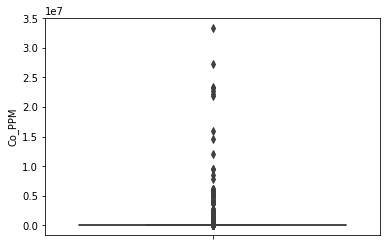

In [52]:
sns.boxplot(y = df[df['Co_PPM'] >=0]['Co_PPM'])

In [90]:
#only keep values of Co lower than 1million
df = df[df['Co_PPM'] < 1000000]

<AxesSubplot:>

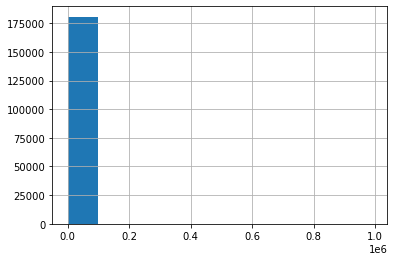

In [261]:
df[df['Co_PPM'] >=0]['Co_PPM'].hist()

In [91]:
df[df['Co_PPM'] >=0]['Co_PPM'].describe()

count    180833.000000
mean        608.019784
std       17602.877511
min           0.000000
25%          13.000000
50%          46.000000
75%         100.000000
max      990000.000000
Name: Co_PPM, dtype: float64

We change negative numbers to 0 for the CMs of interest. 

In [92]:
#only keep relevant rows where CM quantity > 0
df_has_ge = df[df['Ge_PPM'] > 0]
df_has_in = df[df['In_PPM'] > 0]
df_has_co = df[df['Co_PPM'] > 0]

## Calculating Distance

Calculating distance between Drillhole assays that contain the CMs and relevant MINEDEX deposits (Zn deposits for Ge/In, Ni/Cu deposits for Co). 

In [24]:
#using geopy for distance calculation function
def calc_distance(coords_a, coords_b):
       dist = geopy.distance.distance(coords_a, coords_b)
       return(dist)

### For df_has_co run distance function 

We run distance function on the dfs that contain Co, using the Nickel/Copper deposits from Minedex. 

In [12]:
wamex_coords = list(zip(df_has_co['Latitude'], df_has_co['Longitude']))
wamex_coords[1:5]

[(-17.7569136517692, 127.849019474668),
 (-27.3386407789811, 120.562024619201),
 (-16.9366603035346, 124.455884821073),
 (-17.3484558763486, 128.021999076092)]

In [13]:
wamex_coords_nodupl = tuple(set(wamex_coords))
len(wamex_coords_nodupl)

15796

In [15]:
df_minedex = pd.read_csv('Mindex_Ni_Cu_Co_deposits.csv') #Ni-Cu-Co deposits from Minedex
df_minedex = df_minedex.loc[(df_minedex['SITE_TYPE_'] == 'Mine') | (df_minedex['SITE_TYPE_'] == 'Deposit')]

In [16]:
df_minedex['SITE_TYPE_'].value_counts()

Mine       403
Deposit    221
Name: SITE_TYPE_, dtype: int64

In [17]:
data = {'minedex_lat': df_minedex['LATITUDE'], 'minedex_lon': df_minedex['LONGITUDE'], 'minedex_site': df_minedex['SITE_CODE']}
mindex_coords_df = pd.DataFrame(data)

In [18]:
mindex_coords_df.shape

(624, 3)

In [20]:
mindex_coords = list(zip(mindex_coords_df['minedex_lat'], mindex_coords_df['minedex_lon']))
mindex_coords_df['coords'] = mindex_coords

In [22]:
new = pd.DataFrame(columns=['minedex_coords', 'minedex_site', 'wamex_lat', 'wamex_lon', 'distance',])

In [25]:
for i in tqdm(range(0, len(wamex_coords_nodupl))): #for each wamex coords
    for j in range(0, len(mindex_coords_df)): #for each minedex coords
            comp = mindex_coords_df.iloc[j]['coords'] 
            dist = calc_distance(wamex_coords_nodupl[i], comp)
            if dist < 15: #calculate distance 
                new_row = {'minedex_coords': comp, 'minedex_site': mindex_coords_df.iloc[j]['minedex_site'],'wamex_lat':wamex_coords_nodupl[i][0],'wamex_lon': wamex_coords_nodupl[i][1], 'distance':dist}
                new = new.append(new_row, ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████| 15796/15796 [1:23:31<00:00,  3.15it/s]


In [26]:
len(new)

127907

In [27]:
new.to_csv('Distance_MinedexNi_DrillholeCo.csv')
new.head()

,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,"(-26.095381, 127.727402)",S0018904,-26.090248,127.758373,3.150109706137885 km
1,"(-26.107121, 127.696899)",S0019102,-26.090248,127.758373,6.427387183383036 km
2,"(-26.107121, 127.696899)",S0224398,-26.090248,127.758373,6.427387183383036 km
3,"(-28.49011, 121.085197)",S0002329,-28.485627,121.172111,8.52474472323702 km
4,"(-17.656892, 127.991025)",S0020238,-17.656717,127.991867,0.09143106576932553 km


In [28]:
distances = pd.read_csv('Distance_MinedexNi_DrillholeCo.csv')

In [29]:
Merged_Ni_Drillhole_lessthan15km = pd.merge(df_has_co, distances, how='inner', left_on=['Latitude', 'Longitude'], right_on=['wamex_lat', 'wamex_lon'])

In [30]:
Merged_Ni_Drillhole_lessthan15km.head()

,Unnamed: 0_x,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM,Unnamed: 0_y,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.6,79089,...,82.0,-9999.0,8.0,-9999.0,54239,"(-27.70949, 120.655502)",S0002330,-27.606633,120.573672,13.96808096707055 km
1,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.6,79089,...,82.0,-9999.0,8.0,-9999.0,54240,"(-27.60014, 120.575699)",S0006499,-27.606633,120.573672,0.7467836694069735 km
2,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.6,79089,...,82.0,-9999.0,8.0,-9999.0,54241,"(-27.596973, 120.575875)",S0018752,-27.606633,120.573672,1.092291745527003 km
3,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.6,79089,...,82.0,-9999.0,8.0,-9999.0,54242,"(-27.596973, 120.575875)",S0019030,-27.606633,120.573672,1.092291745527003 km
4,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.6,79089,...,82.0,-9999.0,8.0,-9999.0,54243,"(-27.60299, 120.576861)",S0021374,-27.606633,120.573672,0.5118936081728361 km


In [32]:
Merged_Ni_Drillhole_lessthan15km.shape

(1016489, 178)

In [33]:
Merged_Ni_Drillhole_lessthan15km.to_csv('Merged_Ni_Drillhole_lessthan15km.csv')

In [93]:
Merged_Ni_Drillhole_lessthan15km = pd.read_csv('Merged_Ni_Drillhole_lessthan15km.csv')

In [94]:
#remove duplicates
df_Co = Merged_Ni_Drillhole_lessthan15km.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Latitude', 'Longitude', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

In [95]:
df_Co = df_Co.drop_duplicates()
df_Co.head()

,CollarId,CompanyHoleId,HoleType,Azimuth,Dip,MaxDepth,Anumber,SampleId,CompanySampleId,FromDepth,...,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM,wamex_lat,wamex_lon
0,868290,AMD352,DD,360,-90,338.6,79089,18042279,CD011299,86.0,...,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,8.0,-9999.0,-27.606633,120.573672
18,868286,AMD348,DD,360,-90,377.9,79089,18040715,1156461,287.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,7.0,-9999.0,-27.606633,120.573672
36,868288,AMD350,DD,360,-90,374.8,79089,18041566,CD013428,211.0,...,-9999.0,-9999.0,-9999.0,-9999.0,50.0,-9999.0,-5.0,-9999.0,-27.606633,120.573672
54,868287,AMD349,DD,360,-90,349.3,79089,18041158,1158442,217.0,...,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,12.0,-9999.0,-27.606633,120.573672
72,868286,AMD348,DD,360,-90,377.9,79089,18040407,1156228,92.0,...,-9999.0,-9999.0,-9999.0,-9999.0,50.0,-9999.0,-5.0,-9999.0,-27.606633,120.573672


In [96]:
df_Co.shape

(80815, 171)

### For df_has_in and df_has_ge run distance function 

We run distance function on the dfs that contain Co, using the Zn deposits from Minedex. 

In [37]:
wamex_coords_ge = list(zip(df_has_ge['Latitude'], df_has_ge['Longitude']))
wamex_coords_in = list(zip(df_has_in['Latitude'], df_has_in['Longitude']))
wamex_coords = wamex_coords_ge + wamex_coords_in

In [38]:
wamex_coords_nodupl = tuple(set(wamex_coords))
len(wamex_coords_nodupl)

1547

In [39]:
df_minedex = pd.read_csv('MINEDEX-Cu-Pb-Zn(TARGET)Zn(Site Commodity).csv') #Zn deposits from Minedex
df_minedex = df_minedex.loc[(df_minedex['SITE_TYPE_'] == 'Mine') | (df_minedex['SITE_TYPE_'] == 'Deposit')]

In [40]:
df_minedex['SITE_TYPE_'].value_counts()

Mine       95
Deposit    64
Name: SITE_TYPE_, dtype: int64

In [42]:
data = {'minedex_lat': df_minedex['LATITUDE'], 'minedex_lon': df_minedex['LONGITUDE'], 'minedex_site': df_minedex['SITE_CODE']}
mindex_coords_df = pd.DataFrame(data)

In [43]:
mindex_coords_df.shape

(159, 3)

In [44]:
mindex_coords = list(zip(mindex_coords_df['minedex_lat'], mindex_coords_df['minedex_lon']))
mindex_coords_df['coords'] = mindex_coords

In [45]:
new = pd.DataFrame(columns=['minedex_coords', 'minedex_site', 'wamex_lat', 'wamex_lon', 'distance',])

In [46]:
for i in tqdm(range(0, len(wamex_coords_nodupl))):
    for j in range(0, len(mindex_coords_df)):
            comp = mindex_coords_df.iloc[j]['coords']
            dist = calc_distance(wamex_coords_nodupl[i], comp)
            if dist < 15:
                new_row = {'minedex_coords': comp, 'minedex_site': mindex_coords_df.iloc[j]['minedex_site'],'wamex_lat':wamex_coords_nodupl[i][0],'wamex_lon': wamex_coords_nodupl[i][1], 'distance':dist}
                new = new.append(new_row, ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████| 1547/1547 [01:42<00:00, 15.09it/s]


In [47]:
len(new)

853

In [48]:
new.to_csv('Distance_MinedexZn_DrillholeGeandIn.csv')
new.head()

,minedex_coords,minedex_site,wamex_lat,wamex_lon,distance
0,"(-28.40897, 121.147797)",S0002897,-28.402889,121.145887,0.699453444932356 km
1,"(-28.40897, 121.147797)",S0002898,-28.402889,121.145887,0.699453444932356 km
2,"(-28.444611, 121.155098)",S0018933,-28.402889,121.145887,4.711152929844372 km
3,"(-28.444611, 121.155098)",S0019383,-28.402889,121.145887,4.711152929844372 km
4,"(-28.43095, 121.146103)",S0022300,-28.402889,121.145887,3.10998601602845 km


In [49]:
Merged_Zn_Ge_Drillhole_lessthan15km = pd.merge(df_has_ge, distances, how='inner', left_on=['Latitude', 'Longitude'], right_on=['wamex_lat', 'wamex_lon'])

In [52]:
Merged_Zn_Ge_Drillhole_lessthan15km.shape

(34648, 178)

In [53]:
Merged_Zn_In_Drillhole_lessthan15km = pd.merge(df_has_in, distances, how='inner', left_on=['Latitude', 'Longitude'], right_on=['wamex_lat', 'wamex_lon'])

In [54]:
Merged_Zn_In_Drillhole_lessthan15km.to_csv('Merged_Zn_Drillhole_lessthan15km.csv')

In [97]:
Merged_Zn_Drillhole_lessthan15km = pd.read_csv('Merged_Zn_Drillhole_lessthan15km.csv')

#remove duplicates
df_Ge_In = Merged_Zn_Drillhole_lessthan15km.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Latitude', 'Longitude', 
                     'minedex_coords', 'minedex_site',
                    'distance'])

df_Ge_In = df_Ge_In.drop_duplicates()
df_Ge_In.head()

,CollarId,CompanyHoleId,HoleType,Azimuth,Dip,MaxDepth,Anumber,SampleId,CompanySampleId,FromDepth,...,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM,wamex_lat,wamex_lon
0,1569256,DED021,DD,360,-90,420.7,86949,36316448,2101007,335.17,...,8.1,-9999.0,-9999.0,-9999.0,782.0,-9999.0,78.1,-9999.0,-28.401474,120.859059
4,1569256,DED021,DD,360,-90,420.7,86949,36316437,2100995,325.00,...,10.8,-9999.0,-9999.0,-9999.0,114.0,-9999.0,20.2,-9999.0,-28.401474,120.859059
8,1569256,DED021,DD,360,-90,420.7,86949,36316353,2100905,195.00,...,19.7,-9999.0,-9999.0,-9999.0,81.0,-9999.0,39.1,-9999.0,-28.401474,120.859059
12,1569256,DED021,DD,360,-90,420.7,86949,36316350,2100902,192.00,...,16.7,-9999.0,-9999.0,-9999.0,81.0,-9999.0,34.0,-9999.0,-28.401474,120.859059
16,1569256,DED021,DD,360,-90,420.7,86949,36316358,2100911,200.00,...,17.5,-9999.0,-9999.0,-9999.0,76.0,-9999.0,34.4,-9999.0,-28.401474,120.859059


In [98]:
df_Ge_In.shape

(3845, 171)